In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import os

In [19]:
os.chdir("C:\\Users\\Nilesh\\Documents\\GitHub\\07 USA Housing Selling Price Prediction")
df = pd.read_csv("USA_Housing_FT.csv")
df

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Area_Population,Address_mean_encoded,Price
0,-0.104774,-0.164666,-0.164664,-0.233558,0.149731,1.059034e+06
1,-0.106393,-0.164664,-0.164666,-0.142940,0.149731,1.505891e+06
2,-0.204337,-0.164665,-0.164656,-0.160394,0.149731,1.058988e+06
3,-0.193114,-0.164658,-0.164672,-0.174034,0.149731,1.260617e+06
4,-0.211453,-0.164669,-0.164660,-0.216230,0.149731,6.309435e+05
...,...,...,...,...,...,...
4995,-0.208258,-0.164655,-0.164669,-0.234881,0.149731,1.060194e+06
4996,-0.110523,-0.164659,-0.164666,-0.220144,0.149731,1.482618e+06
4997,-0.192866,-0.164658,-0.164676,-0.179571,0.149731,1.030730e+06
4998,-0.167724,-0.164667,-0.164664,-0.129933,0.149731,1.198657e+06


## Seperating dependent and independent variable

In [20]:
X = df.iloc[:,:-1].values
X

array([[-0.10477413, -0.16466583, -0.1646642 , -0.23355797,  0.14973125],
       [-0.10639267, -0.16466418, -0.16466563, -0.14294002,  0.14973125],
       [-0.20433708, -0.16466488, -0.16465645, -0.16039355,  0.14973125],
       ...,
       [-0.19286605, -0.16465775, -0.16467555, -0.17957127,  0.14973125],
       [-0.16772422, -0.16466659, -0.16466358, -0.1299328 ,  0.14973125],
       [-0.18130627, -0.16466423, -0.16466532, -0.10937801,  0.14973125]])

In [21]:
Y = df.iloc[:,-1].values
Y

array([1059033.558, 1505890.915, 1058987.988, ..., 1030729.583,
       1198656.872, 1298950.48 ])

## Train-test split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.66, shuffle=True)

## Selecting Model

### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)
lr_score = str(r2_score(Y_test,reg.predict(X_test)))
print("Linear Regression: "+lr_score)

Linear Regression: 0.5721618289970026


### Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor
dt =DecisionTreeRegressor(min_samples_split=2)
dt.fit(X_train,Y_train)
dt_score = str(r2_score(Y_test,dt.predict(X_test)))
print("Decision Tree Regressor: "+dt_score)

Decision Tree Regressor: 0.7465886696289258


### Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
random_reg= RandomForestRegressor (n_estimators =100)
random_reg.fit(X_train,Y_train)
rfr_score = str(r2_score(Y_test,random_reg.predict(X_test)))
print("Random Forest Regressor: "+rfr_score)

Random Forest Regressor: 0.8794610139823527


In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# define the pipeline and train model
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
                  
model.fit(X_train, Y_train)

# print out regression coefficients
# print(model.named_steps['linear'].coef_)    
# print(model.named_steps['linear'].intercept_)  
pr_score = str(r2_score(Y_test,model.predict(X_test)))
print("Polynomial Regression: "+pr_score)

Polynomial Regression: 0.9110287620218143


### RANSAC Regressor

In [27]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),max_trials=4,min_samples=2,loss='absolute_loss',residual_threshold=10)
ransac.fit(X_train, Y_train)
RANSAC_score = str(r2_score(Y_test,ransac.predict(X_test)))
print("RANSAC Regressor: "+RANSAC_score)

RANSAC Regressor: -0.14528500791487997


C:\Users\Nilesh\anaconda3\lib\site-packages\sklearn\linear_model\_ransac.py:354: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


### Support Vector Regression (SVR)

In [28]:
from sklearn.svm import SVR
svr_rbf=SVR(C=1.0, epsilon=0.2, kernel='rbf')
svr_rbf.fit(X_train, Y_train)
svr_score = str(r2_score(Y_test,svr_rbf.predict(X_test)))
print("Support Vector Regression (SVR): "+svr_score)

Support Vector Regression (SVR): 7.198445883815907e-08


## Hyperparameter Tuning

### Random Forest

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [31]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [32]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)

In [33]:
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1800; total time=   5.4s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1800; total time=   5.1s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1800; total time=   5.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_est

[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   6.8s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   6.8s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   6.8s
[CV] END bootstrap=False, max_dep

[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1600; total time=   6.9s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1600; total time=   4.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1600; total time=   4.7s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1600; total time=   4.6s
[CV] END bootstrap=False, ma

[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400; total time=   1.5s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   4.8s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   5.4s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   5.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   3.0s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800; total time=   1.6s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800; total time=   1.6s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   1.5s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   1.5s
[CV] END bootstrap=True, 

[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   3.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   3.0s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [34]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [35]:
r2_score(Y_test,rf_random.predict(X_test))

0.8802638029848904

## Visualizing Results

In [36]:
pred = rf_random.predict(X_test)

C:\Users\Nilesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


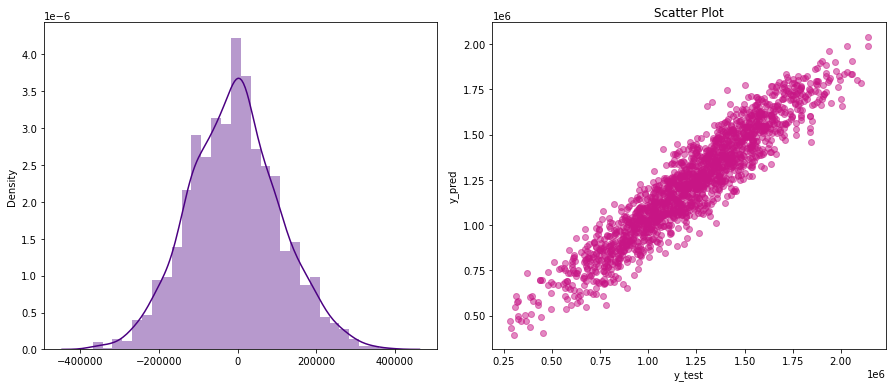

In [37]:
plt.rcParams["figure.figsize"] = [12.50, 5.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)
plt.title("Dist Plot")
sns.distplot(Y_test-pred,ax=axis[0], color="INDIGO")
plt.title("Scatter Plot")
plt.scatter(Y_test,pred, alpha=0.5, color="MEDIUMVIOLETRED")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Save the model to reuse it again

In [38]:
import pickle
file = open('UHSPP_pr.pkl','wb')
pickle.dump(model, file)

In [39]:
model = open('UHSPP_pr.pkl','rb')
UHSPP_pr = pickle.load(model)

In [41]:
Y_prediction = UHSPP_pr.predict(X_test)

In [42]:
CDSPP_score = str(r2_score(Y_test,Y_prediction))
print("Random Forest Regression with hypertuning: "+ str(CDSPP_score))

Random Forest Regression with hypertuning: 0.9116120611318591
